# Module 6. Lab Assignment

In [ ]:
import pandas as pd
import numpy as np
from numpy import nan as NA
import re

## 1. Cleaning the Data

Read the student scores data into a dataframe called `scores`, and display the first 5 rows of the data:

`[+3pts]`

In [ ]:
scores = pd.read_excel("student-scores.xlsx")
scores.head()

,StudentId,Quiz1,Quiz2,Quiz3,GPA,Gender
0,e1231324,50.0,35.0,60.0,1.631575,M
1,e3213235,75.0,60.0,88.0,2.377469,M
2,e6234234,NaN,44.0,81.0,2.085108,F
3,e5122322,80.0,50.0,75.0,2.311345,F
4,e5858111,75.0,51.0,65.0,2.211891,M


Print the dimensions of the `scores` dataframe (number of rows and columns).

`[+1pts]`

In [ ]:
scores.shape

(24, 6)

Delete the student records who has **at least 2** missing quiz scores. The change should be reflected to `scores` dataframe itself.

After the rows with missing values are dropped, please print the shape of the `scores` dataframe. 

`[+6pts]`

In [ ]:
scores.dropna(subset = ['Quiz1', 'Quiz2', 'Quiz1'], thresh = 1 , inplace = True)
scores.shape

(22, 6)

For the remaining of the data, there might be still some missing values in the quiz scores.

For the `Quiz1` and `Quiz2` columns, use the `ffill` and `bfill` approaches (respectively) to replace the missing values.

`[+4pts]`

In [ ]:
scores['Quiz1'].fillna(method='ffill', inplace = True)
scores['Quiz2'].fillna(method='bfill', inplace = True)
scores

,StudentId,Quiz1,Quiz2,Quiz3,GPA,Gender
0,e1231324,50.0,35.0,60.0,1.631575,M
1,e3213235,75.0,60.0,88.0,2.377469,M
2,e6234234,75.0,44.0,81.0,2.085108,F
3,e5122322,80.0,50.0,75.0,2.311345,F
4,e5858111,75.0,51.0,65.0,2.211891,M
5,e1233233,89.0,23.0,NaN,3.732221,F
6,e8327377,90.0,95.0,90.0,3.674193,F
7,e1238388,53.0,69.0,46.0,1.420471,F
8,e2139809,85.0,90.0,85.0,3.458220,M
9,e3727377,55.0,85.0,68.0,1.760775,F


For the `Quiz3` column, replace the missing values with average of all Quiz3 scores.

`[+4pts]`

In [ ]:
scores = scores.fillna(scores["Quiz3"].mean(skipna = True))
scores

,StudentId,Quiz1,Quiz2,Quiz3,GPA,Gender
0,e1231324,50.0,35.0,60.0,1.631575,M
1,e3213235,75.0,60.0,88.0,2.377469,M
2,e6234234,75.0,44.0,81.0,2.085108,F
3,e5122322,80.0,50.0,75.0,2.311345,F
4,e5858111,75.0,51.0,65.0,2.211891,M
5,e1233233,89.0,23.0,74.0,3.732221,F
6,e8327377,90.0,95.0,90.0,3.674193,F
7,e1238388,53.0,69.0,46.0,1.420471,F
8,e2139809,85.0,90.0,85.0,3.458220,M
9,e3727377,55.0,85.0,68.0,1.760775,F


After these operations, write a single line of statement that should print `True` if there any missing value in `Quiz1`, `Quiz2`, or `Quiz3` columns, and `False` otherwise. The expected output is shown below:

    Quiz1    False
    Quiz2    False
    Quiz3    False 


`[+6pts]`

In [ ]:
scores.isnull().any()

StudentId    False
Quiz1        False
Quiz2        False
Quiz3        False
GPA          False
Gender       False
dtype: bool

If you print the dataset below, you may notice that all quiz scores are float type as they have decimal points. However, we want to keep them as integer values (thus, getting rid of the decimal points).

For the conversion you can use the `.astype('int64')` function. Also, the related column names are already provided inside the `quizCols` list.

`[+2pts]`

In [ ]:
quizCols = ['Quiz1', 'Quiz2', 'Quiz3']
scores[quizCols] = scores[quizCols].astype('int64')
scores

,StudentId,Quiz1,Quiz2,Quiz3,GPA,Gender
0,e1231324,50,35,60,1.631575,M
1,e3213235,75,60,88,2.377469,M
2,e6234234,75,44,81,2.085108,F
3,e5122322,80,50,75,2.311345,F
4,e5858111,75,51,65,2.211891,M
5,e1233233,89,23,74,3.732221,F
6,e8327377,90,95,90,3.674193,F
7,e1238388,53,69,46,1.420471,F
8,e2139809,85,90,85,3.458220,M
9,e3727377,55,85,68,1.760775,F


Next, we will round the GPA scores to two decimal points. For this purpose, you can use the `.round()` function.

`[+1pts]`

In [ ]:
scores['GPA'] = scores['GPA'].round(2)
scores

,StudentId,Quiz1,Quiz2,Quiz3,GPA,Gender
0,e1231324,50,35,60,1.63,M
1,e3213235,75,60,88,2.38,M
2,e6234234,75,44,81,2.09,F
3,e5122322,80,50,75,2.31,F
4,e5858111,75,51,65,2.21,M
5,e1233233,89,23,74,3.73,F
6,e8327377,90,95,90,3.67,F
7,e1238388,53,69,46,1.42,F
8,e2139809,85,90,85,3.46,M
9,e3727377,55,85,68,1.76,F


Now, we will identify some corrupted StudentId records. By default, the student id starts with letter `e` followed by 7 digits. 

If you check the last 5 records, you may notice that some student ids have an invalid format.

In [ ]:
scores.tail()

,StudentId,Quiz1,Quiz2,Quiz3,GPA,Gender
17,e39238f2,88,95,60,3.32,F
18,eo293939,79,20,3,2.29,F
19,ep392399,42,90,87,2.08,F
21,e1238388,55,90,79,2.21,M
22,e3213235,80,65,100,3.11,F


Below is the `regex` pattern to identify the valid student ids. Use this pattern to compile a `regex` object.

`[+2pts]`

In [ ]:
pattern = r'(?:^|\D)(\d{7})(?!\d)'
regex = re.compile(pattern)

Then, you need to use the compiled `regex` object to filter out the invalid student ids. You need to use `apply` with a valid `lambda` function. 

`HINT`: The `regex.search('e1234567')` statement will return an object whereas the `regex.search('e1A34567')` will return `None` since `e1A34567` does not match the desired pattern.

Inside the lambda function, you will need to use `regex.search()`.

`[+12pts]`

In [ ]:
arr1 = scores['StudentId'].apply(lambda x: regex.search(x)==None)
arr1 = pd.DataFrame(arr1)
arr1 = arr1.loc[arr1['StudentId'] ==True]
arr = arr1.index.tolist()
scores = scores.drop(arr)
scores

,StudentId,Quiz1,Quiz2,Quiz3,GPA,Gender
0,e1231324,50,35,60,1.63,M
1,e3213235,75,60,88,2.38,M
2,e6234234,75,44,81,2.09,F
3,e5122322,80,50,75,2.31,F
4,e5858111,75,51,65,2.21,M
5,e1233233,89,23,74,3.73,F
6,e8327377,90,95,90,3.67,F
7,e1238388,53,69,46,1.42,F
8,e2139809,85,90,85,3.46,M
9,e3727377,55,85,68,1.76,F


In the last part of the data cleaning, we will check if there are any duplicate student records.

Use the `duplicated()` function along with the `any` function to display `True` if there are any duplicate values in the `StudentId` column:

`[+3pts]`

In [ ]:
scores.duplicated(['StudentId']).any()

True

Now, remove the duplicate student id records, which is the last task of data cleaning.

`[+4pts]`

In [ ]:
scores = scores.drop_duplicates(['StudentId'])
scores

,StudentId,Quiz1,Quiz2,Quiz3,GPA,Gender
0,e1231324,50,35,60,1.63,M
1,e3213235,75,60,88,2.38,M
2,e6234234,75,44,81,2.09,F
3,e5122322,80,50,75,2.31,F
4,e5858111,75,51,65,2.21,M
5,e1233233,89,23,74,3.73,F
6,e8327377,90,95,90,3.67,F
7,e1238388,53,69,46,1.42,F
8,e2139809,85,90,85,3.46,M
9,e3727377,55,85,68,1.76,F


Print the shape of the `scores` dataframe. It should display that the dataframe has 16 rows.

`[+1pts]`

In [ ]:
scores.shape

(16, 6)

## 2. Creating Bins [+50pts]

Create bins based on the **average** of three quiz scores. The boundry values should be `[0, 60, 70, 80, 90, 100]` for the bins. You should use the following values to label the bins: `['F', 'D', 'C', 'B', 'A']`.

As seen in the following image, you should add a new column called `GradeLetter` to the `scores` dataset to indicate to which bin each student belongs to. (The dataframe will have 16 rows not 1 as in the image).

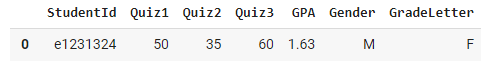

`[+15pts]`

In [ ]:
scores['mean'] = scores.iloc[:, [1,2,3]].mean(axis=1)
bins = [0, 60, 70, 80, 90, 100]
grades = ['F', 'D', 'C', 'B', 'A']
cats = pd.cut(scores['mean'], bins, labels = grades, right = False)
scores['GradeLetter'] = cats
scores = scores.drop(labels=['mean'], axis=1)
scores

,StudentId,Quiz1,Quiz2,Quiz3,GPA,Gender,GradeLetter
0,e1231324,50,35,60,1.63,M,F
1,e3213235,75,60,88,2.38,M,C
2,e6234234,75,44,81,2.09,F,D
3,e5122322,80,50,75,2.31,F,D
4,e5858111,75,51,65,2.21,M,D
5,e1233233,89,23,74,3.73,F,D
6,e8327377,90,95,90,3.67,F,A
7,e1238388,53,69,46,1.42,F,F
8,e2139809,85,90,85,3.46,M,B
9,e3727377,55,85,68,1.76,F,D


Display the number of students in each bin:

`[+3pts]`

In [ ]:
pd.value_counts(scores['GradeLetter'])

D    6
F    3
A    3
C    2
B    2
Name: GradeLetter, dtype: int64

You should also bin the dataset based on the GPA. This time the boundry values should be `[0, 2.0, 2.5, 3.0, 3.5, 4.0]` for the bins. You should use the following values to label the bins: `['F', 'D', 'C', 'B', 'A']`.

As seen in the following image, you should add a new column called `GPALetter` to the `scores` dataset to indicate to which bin each student belongs to based on their `GPA`. (The dataframe will have 16 rows not 1 as in the image).
<br><br>
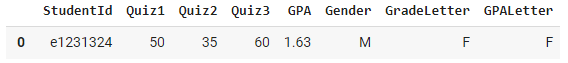

`[+15pts]`

In [ ]:
binss = [0, 2.0, 2.5, 3.0, 3.5, 4.0]
gradess = ['F', 'D', 'C', 'B', 'A']
catss = pd.cut(scores['GPA'], binss, labels = gradess, right = False)
scores['GPALetter'] = catss
scores

,StudentId,Quiz1,Quiz2,Quiz3,GPA,Gender,GradeLetter,GPALetter
0,e1231324,50,35,60,1.63,M,F,F
1,e3213235,75,60,88,2.38,M,C,D
2,e6234234,75,44,81,2.09,F,D,D
3,e5122322,80,50,75,2.31,F,D,D
4,e5858111,75,51,65,2.21,M,D,D
5,e1233233,89,23,74,3.73,F,D,A
6,e8327377,90,95,90,3.67,F,A,A
7,e1238388,53,69,46,1.42,F,F,F
8,e2139809,85,90,85,3.46,M,B,B
9,e3727377,55,85,68,1.76,F,D,F


Display the number of students in each bin:

`[+3pts]`

In [ ]:
pd.value_counts(scores['GPALetter'])

D    5
F    4
B    3
A    3
C    1
Name: GPALetter, dtype: int64

Get the number of students whose GPALetter is equal to GradeLetter.

`[+5pts]`

In [ ]:
num = pd.value_counts(scores['GPALetter']==scores['GradeLetter'])
num[True]

12

Create dummy variables based on the `Gender` column. Then, add these dummy variables to the `scores` dataframe. 

At the end, you should obtain the following dataframe (with 16 rows):
<br><br>
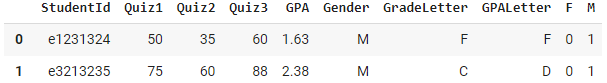

`[+9pts]`

In [ ]:
dummyVisits = pd.get_dummies(scores['Gender'])
scores = scores.join(dummyVisits)
scores

,StudentId,Quiz1,Quiz2,Quiz3,GPA,Gender,GradeLetter,GPALetter,F,M
0,e1231324,50,35,60,1.63,M,F,F,0,1
1,e3213235,75,60,88,2.38,M,C,D,0,1
2,e6234234,75,44,81,2.09,F,D,D,1,0
3,e5122322,80,50,75,2.31,F,D,D,1,0
4,e5858111,75,51,65,2.21,M,D,D,0,1
5,e1233233,89,23,74,3.73,F,D,A,1,0
6,e8327377,90,95,90,3.67,F,A,A,1,0
7,e1238388,53,69,46,1.42,F,F,F,1,0
8,e2139809,85,90,85,3.46,M,B,B,0,1
9,e3727377,55,85,68,1.76,F,D,F,1,0
